# Student Grade Calculator using LangGraph

This notebook demonstrates how to create a simple state-based graph using LangGraph to process student grades and generate comprehensive grade reports.

## Overview

The notebook covers:
- Defining a structured state using TypedDict
- Creating a grade calculation node
- Building and visualizing a LangGraph workflow
- Processing student data and generating reports

## Requirements

Make sure you have the following packages installed:
``` shell
pip install langgraph typing ipython
```

## 1. Import Required Libraries


In [1]:
# Import necessary modules for type hinting, graph creation, and display
from typing import TypedDict, List  # TypedDict for structured state definition, List for type hints
from langgraph.graph import StateGraph  # Core LangGraph class for creating state-based graphs
from IPython.display import Image, display  # For displaying graph visualizations in Jupyter notebooks

## 2. Define the State Structure

We'll define a `StudentState` class using `TypedDict` to ensure type safety and provide a clear contract for the data flowing through our graph.

In [2]:
# Define the state structure using TypedDict for type safety and clarity
class StudentState(TypedDict):
    """
    State schema that defines the structure of data flowing through the graph.
    This acts as a contract for what data each node can expect and modify.
    """
    scores: List[float]      # List of numerical scores (e.g., test scores, assignment grades)
    student_name: str        # Full name of the student
    course_name: str         # Name of the course being graded
    grade_report: str        # Final formatted grade report (generated by the node)

## 3. Create the Grade Calculation Function

This function will serve as our main processing node. It takes student scores and generates a comprehensive grade report including:
- Average score calculation
- Letter grade assignment based on standard grading scale
- Formatted report generation

In [3]:
def calculate_grade(state: StudentState) -> StudentState:
    """
    Node function that processes student scores and generates a comprehensive grade report.
    
    Args:
        state (StudentState): Current state containing scores, student info, and course info
        
    Returns:
        StudentState: Updated state with the grade_report field populated
        
    Note: In LangGraph, node functions receive the current state and return an updated state.
    The framework automatically merges the returned state with the existing state.
    """
    print(f"Processing grades for: {state}")
    
    # Calculate the arithmetic mean of all scores
    average_score = sum(state["scores"]) / len(state["scores"])
    
    # Apply standard grading scale to determine letter grade
    # This uses a typical 10-point grading scale
    if average_score >= 90:
        letter_grade = "A"
    elif average_score >= 80:
        letter_grade = "B"
    elif average_score >= 70:
        letter_grade = "C"
    elif average_score >= 60:
        letter_grade = "D"
    else:
        letter_grade = "F"
    
    # Generate a formatted report string with all relevant information
    # This modifies the state by adding the grade_report field
    state["grade_report"] = (
        f"Student: {state['student_name']}\n"
        f"Course: {state['course_name']}\n"
        f"Individual Scores: {', '.join(map(str, state['scores']))}\n"
        f"Average Score: {average_score:.2f}%\n"
        f"Final Grade: {letter_grade}"
    )
    
    print(f"Completed processing: {state['grade_report']}")
    return state  # Return the modified state for LangGraph to process

## 4. Build the LangGraph Workflow

Now we'll create the state graph, add our grade calculation node, and compile it into an executable application.

In [4]:
# Create the state graph using the defined state schema
# StateGraph manages state transitions and ensures type safety
graph = StateGraph(StudentState)

# Add the grade calculation function as a node in the graph
# The node name "grade_calculator" is an identifier for this processing step
graph.add_node("grade_calculator", calculate_grade)

# Define the graph flow: set entry and exit points
graph.set_entry_point("grade_calculator")   # This node will be executed first
graph.set_finish_point("grade_calculator")  # This node marks the end of processing

# Compile the graph into an executable application
# This step validates the graph structure and prepares it for execution
app = graph.compile()

print("✅ Graph successfully compiled!")

✅ Graph successfully compiled!


## 5. Visualize the Graph Structure

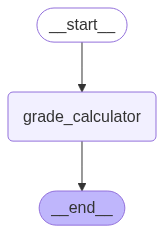

In [5]:
# Display the graph as an image in Jupyter notebooks
# The mermaid format creates flowchart-style diagrams
display(Image(app.get_graph().draw_mermaid_png()))

## 6. Save Graph Visualizations (Optional)

In [6]:
import os

# Create output directory if it doesn't exist
os.makedirs("output", exist_ok=True)

# Save the graph visualization as a PNG file for documentation purposes
with open("output/04-Multiple_Inputs.png", "wb") as f:
    f.write(app.get_graph().draw_mermaid_png())
    
# Save the raw Mermaid diagram code for potential reuse or modification
# Mermaid is a popular diagramming syntax that can be rendered in many tools
with open("output/04-Multiple_Inputs.mmd", "w") as f:
    f.write(app.get_graph().draw_mermaid())

print("📁 Graph visualizations saved to output/ directory")

📁 Graph visualizations saved to output/ directory


## 7. Execute the Graph with Sample Data

In [7]:
# Execute the graph with sample student data
# The invoke method runs the entire graph pipeline with the provided input state
result = app.invoke({
    "scores": [88.5, 92.0, 85.5, 94.0, 87.5],  # Sample test scores
    "student_name": "Alice Johnson",             # Student identifier
    "course_name": "Python Programming"         # Course context
    # Note: grade_report will be generated by the calculate_grade node
})

print("\n🎯 Graph execution completed!")

Processing grades for: {'scores': [88.5, 92.0, 85.5, 94.0, 87.5], 'student_name': 'Alice Johnson', 'course_name': 'Python Programming'}
Completed processing: Student: Alice Johnson
Course: Python Programming
Individual Scores: 88.5, 92.0, 85.5, 94.0, 87.5
Average Score: 89.50%
Final Grade: B

🎯 Graph execution completed!


## 8. Display the Final Grade Report

In [ ]:
print("📊 FINAL GRADE REPORT:")
print("=" * 50)
print(result["grade_report"])
print("=" * 50)

📊 FINAL GRADE REPORT:
Student: Alice Johnson
Course: Python Programming
Individual Scores: 88.5, 92.0, 85.5, 94.0, 87.5
Average Score: 89.50%
Final Grade: B
